<a href="https://colab.research.google.com/github/jpmaldonadoc/6220-ICU-Beds-/blob/main/6210_Total_Quality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning Modules
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV


In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/jpmaldonadoc/6220-ICU-Beds-/main/owid-covid-data%20Python%20Prueba.csv')
df.head(n=25)

,icu_patients
0,555
1,574
2,615
3,662
4,701
5,753
6,793
7,858
8,896
9,917


In [20]:
DDT = df [['icu_patients']]
print (DDT.head())

   icu_patients
0           555
1           574
2           615
3           662
4           701


In [21]:
DDT['Difference'] = DDT['icu_patients'].diff() 
DDT['Difference'] = abs(DDT['Difference'])  

In [22]:
DDT.head()

,icu_patients,Difference
0,555,NaN
1,574,19.0
2,615,41.0
3,662,47.0
4,701,39.0


In [23]:
X_men = DDT['icu_patients'].tail(200).mean(axis=0)
X_men

925.625

In [24]:
R_men = DDT['Difference'].tail(200).mean(axis=0)
R_men

22.6984126984127

In [25]:
DDT['X_men'] = DDT['icu_patients'].tail(200).mean(axis=0)
DDT['R_men'] = DDT['Difference'].tail(200).mean(axis=0)
DDT['UCLr'] = 3.27 * DDT['R_men']
DDT['UCLx'] = DDT['X_men'] + (2.66*DDT['R_men'])
DDT['LCLx'] = DDT['X_men'] - (2.66*DDT['R_men'])
DDT.head()

,icu_patients,Difference,X_men,R_men,UCLr,UCLx,LCLx
0,555,NaN,925.625,22.698413,74.22381,986.002778,865.247222
1,574,19.0,925.625,22.698413,74.22381,986.002778,865.247222
2,615,41.0,925.625,22.698413,74.22381,986.002778,865.247222
3,662,47.0,925.625,22.698413,74.22381,986.002778,865.247222
4,701,39.0,925.625,22.698413,74.22381,986.002778,865.247222


Standard deviation for the process

In [26]:
DDT['std_T'] = DDT['R_men']/1.128
DDT.tail(2)

,icu_patients,Difference,X_men,R_men,UCLr,UCLx,LCLx,std_T
62,580,4.0,925.625,22.698413,74.22381,986.002778,865.247222,20.122706
63,571,9.0,925.625,22.698413,74.22381,986.002778,865.247222,20.122706


In [55]:
ZZT = DDT.tail(70)

In [56]:
ZZT.dtypes

icu_patients      int64
Difference      float64
X_men           float64
R_men           float64
UCLr            float64
UCLx            float64
LCLx            float64
std_T           float64
dtype: object

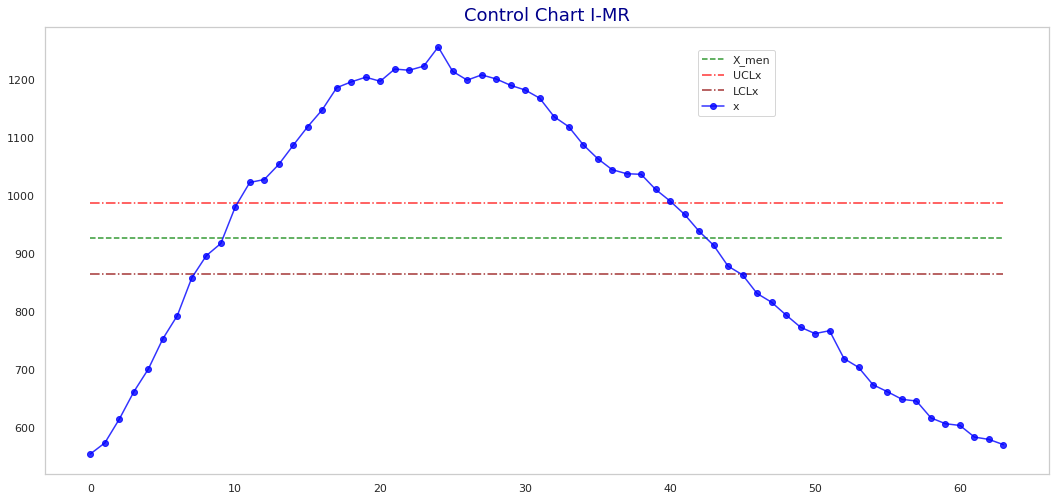

In [65]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4,figsize=(18, 28))

grid = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2)
ax2 = plt.subplot(grid[0, 0:])


ax2.set_title('Control Chart I-MR', color='darkblue', fontsize=18)
ax2.plot(ZZT['X_men'],'--',color='green', alpha=0.8, label='X_men')
ax2.plot(ZZT['UCLx'],'-.',color='red', alpha=0.8, label='UCLx')
ax2.plot(ZZT['LCLx'],'-.',color='darkred', alpha=0.8, label='LCLx')
ax2.plot(ZZT['icu_patients'],'go-',color='blue', alpha=0.8, label='x')
ax2.legend(loc=(0.65, 0.8))
ax2.grid()
ax2.annotate('UCL', xy=(1,1), xytext=(0.95, 0.89), textcoords='axes fraction', fontsize=18, color='red')
ax2.annotate('LCL', xy=(1,1), xytext=(0.95, 0.07), textcoords='axes fraction', fontsize=18, color='black')
ax2.annotate('mean', xy=(1,1), xytext=(0.95, 0.5), textcoords='axes fraction', fontsize=18, color='green')

ax3.set_title('Moving Range (R)', color='darkblue')
ax3.plot(ZZT['UCLr'],color='brown', alpha=0.8)
ax3.plot( ZZT['Difference'], color='black', alpha=0.8)
ax3.grid()

No handles with labels found to put in legend.


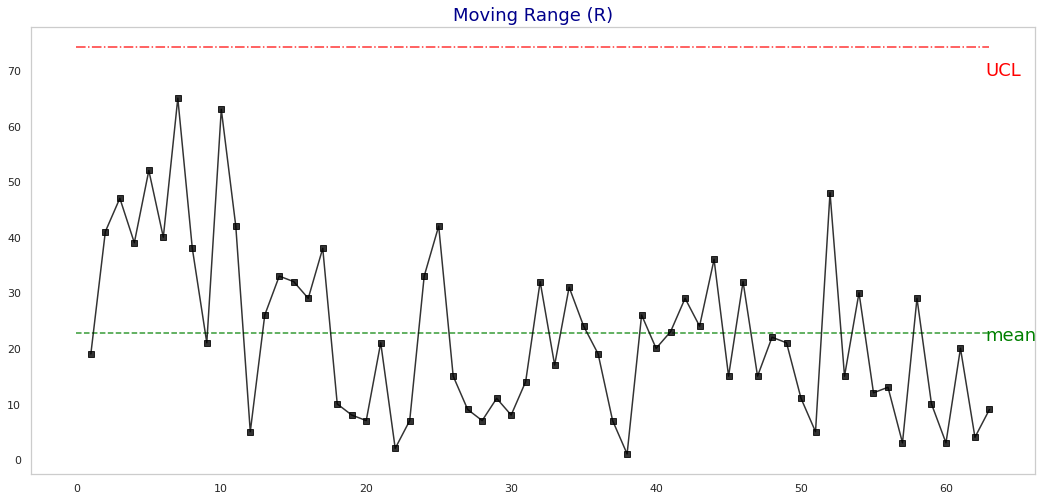

In [64]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4,figsize=(18, 28))

grid = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2)
ax3 = plt.subplot(grid[0, 0:])

ax2.set_title('Control Chart I-MR', color='darkblue')
ax2.plot(ZZT['X_men'],color='green', alpha=0.8)
ax2.plot(ZZT['UCLx'],color='red', alpha=0.8)
ax2.plot(ZZT['LCLx'],color='red', alpha=0.8)
ax2.plot(ZZT['icu_patients'],color='blue', alpha=0.8)
ax2.legend(loc=(0.65, 0.8))
ax2.grid()

ax3.set_title('Moving Range (R)', color='darkblue', fontsize=18)
ax3.plot(ZZT['UCLr'],'-.',color='red',alpha=0.8, label='UCLr')
ax3.plot( ZZT['R_men'],'--',color='green', alpha=0.8, label='R_men')
ax3.plot( ZZT['Difference'],'rs-', color='black', alpha=0.8, label='R')
ax3.annotate('mean', xy=(1,1), xytext=(0.95, 0.3), textcoords='axes fraction', fontsize=18, color='green')
ax3.annotate('UCL', xy=(1,1), xytext=(0.95, 0.89), textcoords='axes fraction', fontsize=18, color='red')
ax3.grid()

